In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
# Memuat dataset'
try:
    df = pd.read_csv(r"C:\Users\ASUS\Downloads\Repo_Kriteria1_Daviq\insurance_raw\insurance.csv")
    print("Dataset berhasil dimuat!")
    
    print("\n5 data teratas:")
    display(df.head())
    
    print("\nInformasi Dataset:")
    print(df.info())

except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan struktur folder sudah benar: insurance_raw/insurance.csv")

Dataset berhasil dimuat!

5 data teratas:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Jumlah Missing Value per Kolom:age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Jumlah Data Duplikat: 1


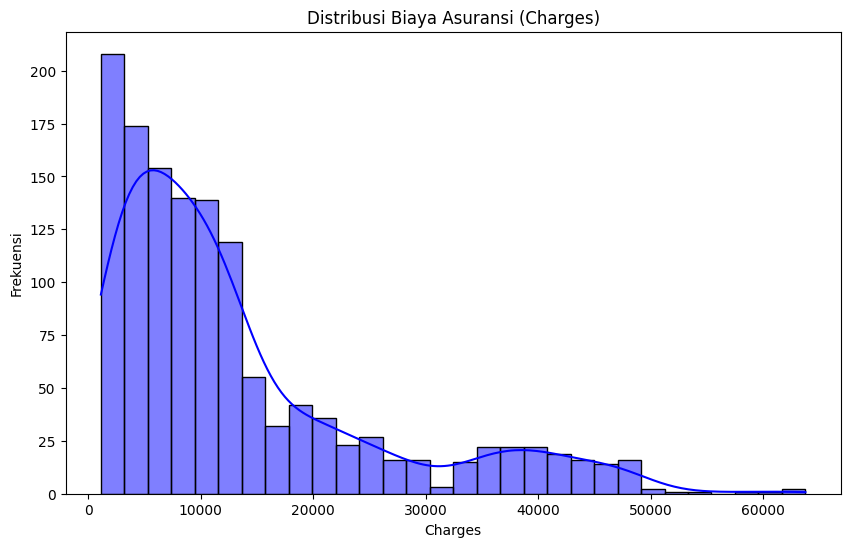

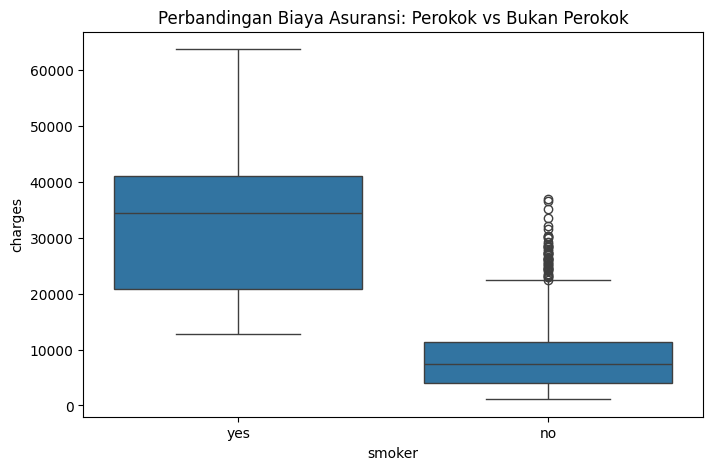

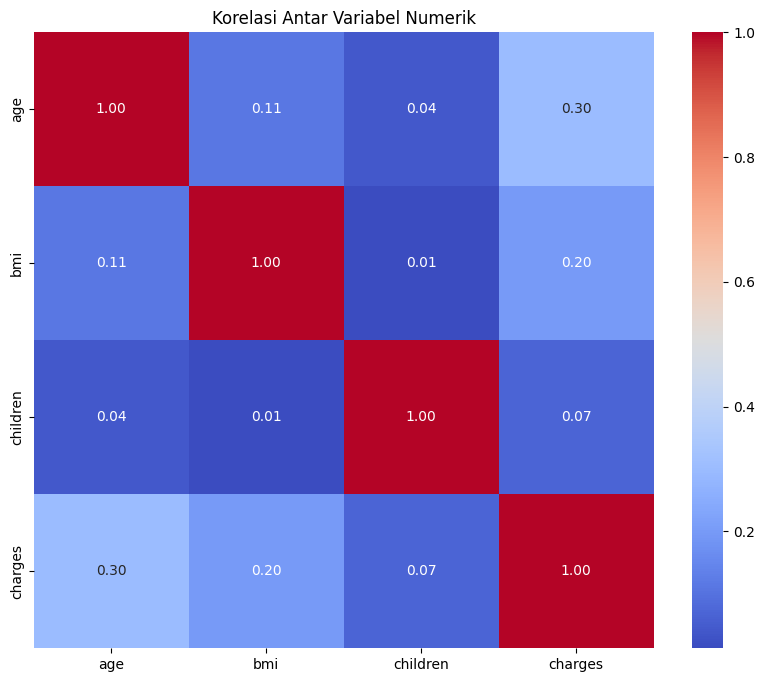

In [6]:
display(df.describe())

# Cek Missing Value
print(f"\nJumlah Missing Value per Kolom:{df.isnull().sum()}")

# Cek Duplikasi Data
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

# Visualisasi Distribusi Target
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribusi Biaya Asuransi (Charges)')
plt.xlabel('Charges')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi Hubungan Perokok vs Charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Perbandingan Biaya Asuransi: Perokok vs Bukan Perokok')
plt.show()

# 6. Correlation Heatmap (Hanya untuk kolom numerik)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number]) # Memilih kolom angka
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

In [16]:
# Membuat salinan dataframe
df_clean = df.copy()

# Menangani Data Duplikat
df_clean.drop_duplicates(inplace=True)

# Encoding Data Kategorikal (Mengubah Teks jadi Angka)
# Encoding 'sex': female = 0, male = 1
le_sex = LabelEncoder()
df_clean['sex'] = le_sex.fit_transform(df_clean['sex'])

# Encoding 'smoker': no = 0, yes = 1
le_smoker = LabelEncoder()
df_clean['smoker'] = le_smoker.fit_transform(df_clean['smoker'])

# Encoding 'region': Menggunakan One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=['region'], prefix='region')

# Mengubah kolom boolean hasil One-Hot Encoding menjadi int
for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        df_clean[col] = df_clean[col].astype(int)

# Menampilkan Hasil Akhir Preprocessing
print("\nData setelah preprocessing:")
display(df_clean.head())

# Cek tipe data 
print("\nTipe data akhir:")
print(df_clean.dtypes)

# Simpan hasil preprocessing ke CSV
df_clean.to_csv('insurance_clean.csv', index=False)
print("\nFile 'insurance_clean.csv' berhasil disimpan!")


Data setelah preprocessing:


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0



Tipe data akhir:
age                   int64
sex                   int32
bmi                 float64
children              int64
smoker                int32
charges             float64
region_northeast      int32
region_northwest      int32
region_southeast      int32
region_southwest      int32
dtype: object

File 'insurance_clean.csv' berhasil disimpan!
